In [1]:
import pandas as pd

In [15]:
data = pd.read_csv('shootings_2018.csv')

In [16]:
data.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


In [17]:
data.describe()

,Dead,Injured,Total
count,322.000000,322.000000,322.000000
mean,1.189441,4.009317,5.195652
std,1.916841,2.300597,2.983169
min,0.000000,0.000000,4.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,2.000000,5.000000,5.000000
max,17.000000,22.000000,34.000000


In [38]:
dropedDesc = data.drop(['Description'], axis = 1)


In [31]:
data.loc[data['State'] == 'New York']
data.drop(['Description'], axis = 1)

,Date,State,Dead,Injured,Total
0,31/12/2018,Ohio,3,2,5
1,29/12/2018,Ohio,1,3,4
2,28/12/2018,Missouri,4,1,5
3,24/12/2018,Louisiana,2,2,4
4,23/12/2018,Missouri,0,7,7
...,...,...,...,...,...
317,07/01/2018,Alabama,1,5,6
318,07/01/2018,Florida,0,4,4
319,05/01/2018,Mississippi,0,6,6
320,04/01/2018,Arkansas,1,3,4


# Must convert 'Date' to a datetime to make it m-d-y


In [41]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         322 non-null    datetime64[ns]
 1   State        322 non-null    object        
 2   Dead         322 non-null    int64         
 3   Injured      322 non-null    int64         
 4   Total        322 non-null    int64         
 5   Description  322 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.2+ KB


## Converted to m-d-y

In [42]:
data['Date'] = data['Date'].dt.strftime('%m-%d-%Y')
data.head()

,Date,State,Dead,Injured,Total,Description
0,12-31-2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,12-29-2018,Ohio,1,3,4,One person was killed and three people were wo...
2,12-28-2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,12-24-2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,12-23-2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


<AxesSubplot:title={'center':'Mass Shootings by State in 2018'}>

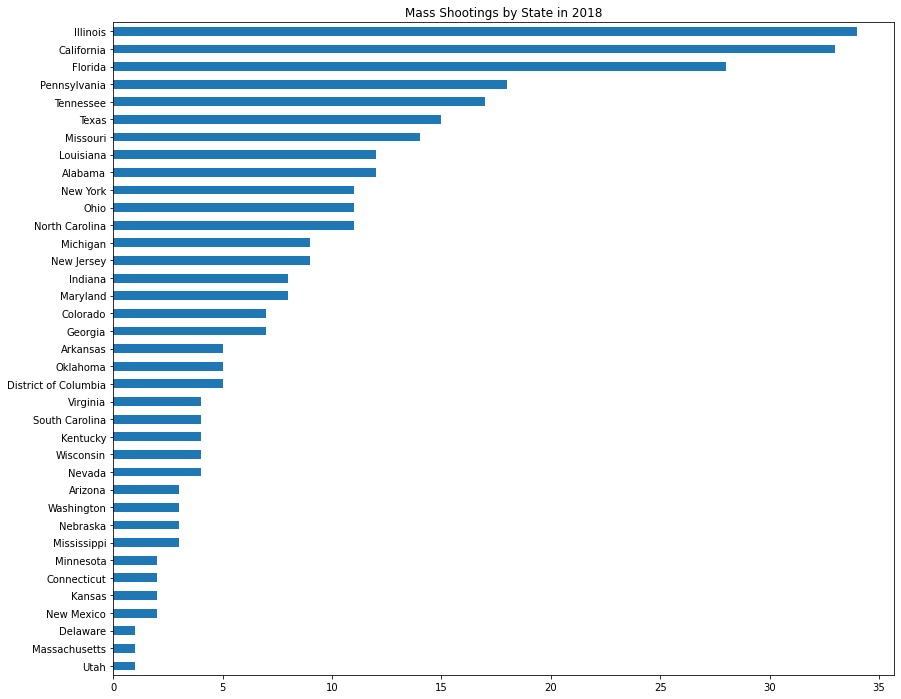

In [43]:
title_text = "Mass Shootings by State in 2018"
data['State'].value_counts().sort_values().plot.barh(figsize=(14,12), title = title_text)

# Most common words in incident descriptions

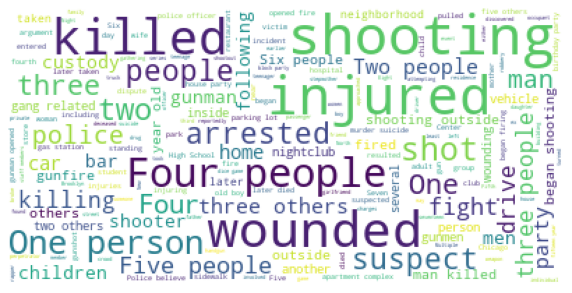

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

descriptions = ' '.join(data['Description'])
stopwords = STOPWORDS

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=250,
                      max_font_size=40,
                      random_state=42).generate(descriptions)

plt.figure(figsize = (10, 10), facecolor = None)
plt.axis('off')
plt.imshow(wordcloud);

In [63]:
newYorkData = data.loc[data['State'] == 'New York']
print(newYorkData)

           Date     State  Dead  Injured  Total  \
13   08-12-2018  New York     0        5      5   
37   03-11-2018  New York     0        5      5   
94   08-18-2018  New York     0        4      4   
151  05-07-2018  New York     0        4      4   
152  05-07-2018  New York     0        4      4   
160  02-07-2018  New York     2        2      4   
194  06-14-2018  New York     1        4      5   
196  12-06-2018  New York     0        4      4   
212  02-06-2018  New York     0        5      5   
240  02-05-2018  New York     1        4      5   
285  03-03-2018  New York     1        3      4   

                                           Description  
13   Five people were wounded outside of a nightclu...  
37   Five people were wounded in a shooting outside...  
94   Four people were injured during gunfire during...  
151  Four people were injured in Brooklyn when they...  
152            Four people were injured in a shooting.  
160  A woman and a 17-month-old child were ki